<a href="https://colab.research.google.com/github/Prashanth0421/07012025/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv("/content/decision_tree_regressor_dataset_v2 (1).csv")
df.head()

,Age,Gender,Monthly_Income,Brand_Awareness,Store_Experience,Quality_Rating,Price_Sensitivity,Purchase_Likelihood
0,58,Male,81476,2,1,3,3,1.932503
1,48,Female,64811,2,4,4,5,1.935945
2,34,Male,56208,2,3,4,1,2.375807
3,27,Male,40150,3,4,5,5,2.095519
4,40,Male,91180,3,4,2,2,1.964777


In [8]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [9]:
df.head(4)

,Age,Gender,Monthly_Income,Brand_Awareness,Store_Experience,Quality_Rating,Price_Sensitivity,Purchase_Likelihood
0,58,1,81476,2,1,3,3,1.932503
1,48,0,64811,2,4,4,5,1.935945
2,34,1,56208,2,3,4,1,2.375807
3,27,1,40150,3,4,5,5,2.095519


In [39]:
# Create a binary 'Purchase' column from 'Purchase_Likelihood'
# We will use the median of 'Purchase_Likelihood' as a threshold for demonstration.
median_likelihood = df['Purchase_Likelihood'].median()
df['Purchase'] = (df['Purchase_Likelihood'] > median_likelihood).astype(int)

In [12]:
df.isnull().sum()


,0
Age,0
Gender,0
Monthly_Income,0
Brand_Awareness,0
Store_Experience,0
Quality_Rating,0
Price_Sensitivity,0
Purchase_Likelihood,0


In [13]:
df.head(4)

,Age,Gender,Monthly_Income,Brand_Awareness,Store_Experience,Quality_Rating,Price_Sensitivity,Purchase_Likelihood
0,58,1,81476,2,1,3,3,1.932503
1,48,0,64811,2,4,4,5,1.935945
2,34,1,56208,2,3,4,1,2.375807
3,27,1,40150,3,4,5,5,2.095519


In [14]:
df.describe()


,Age,Gender,Monthly_Income,Brand_Awareness,Store_Experience,Quality_Rating,Price_Sensitivity,Purchase_Likelihood
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.156667,0.466667,80590.326667,2.976667,2.873333,3.086667,2.916667,2.337411
std,11.891881,0.499721,37285.119038,1.398562,1.425035,1.425692,1.441057,1.006901
min,20.000000,0.000000,20384.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,47487.750000,2.000000,2.000000,2.000000,2.000000,1.650253
50%,41.500000,0.000000,76287.500000,3.000000,3.000000,3.000000,3.000000,2.295931
75%,51.000000,1.000000,111892.250000,4.000000,4.000000,4.000000,4.000000,3.024854
max,59.000000,1.000000,149695.000000,5.000000,5.000000,5.000000,5.000000,4.909441


In [15]:
df.fillna(df.mean(numeric_only=True), inplace=True)


PART B: Data Visualization


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


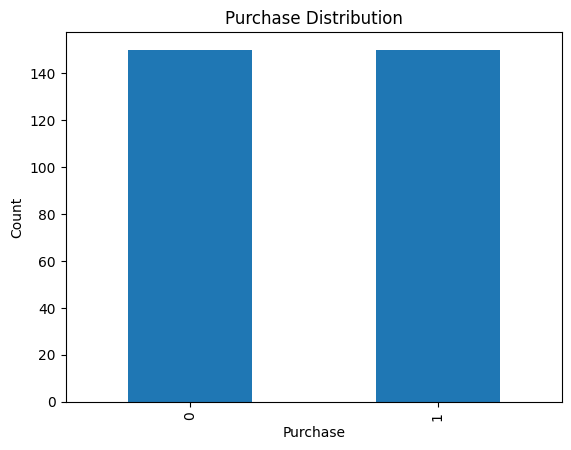

In [22]:
df['Purchase'].value_counts().plot(kind='bar')
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.title("Purchase Distribution")
plt.show()


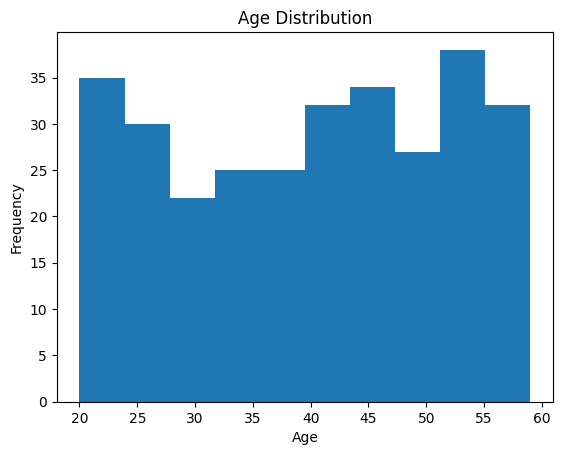

In [24]:
plt.hist(df['Age'], bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


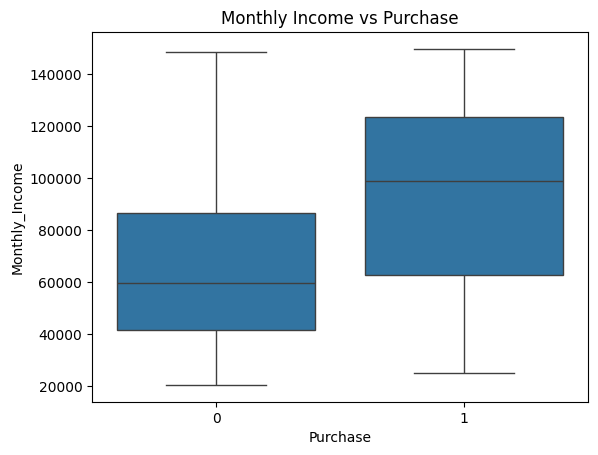

In [27]:
sns.boxplot(x='Purchase', y='Monthly_Income', data=df)
plt.title("Monthly Income vs Purchase")
plt.show()

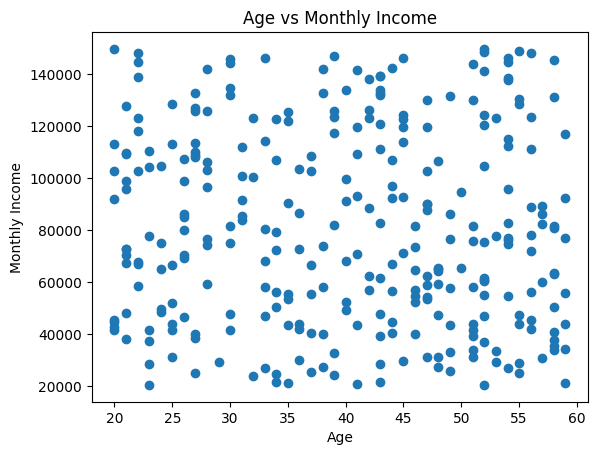

In [28]:
plt.scatter(df['Age'], df['Monthly_Income'])
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Age vs Monthly Income")
plt.show()

PART C: Logistic Regression

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchase', axis=1)
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.85
[[21  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.83      0.91      0.87        33

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.85        60
weighted avg       0.85      0.85      0.85        60



PART D: Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
y_pred_dt = dt.predict(X_test)

confusion_matrix(y_test, y_pred_dt)


array([[26,  1],
       [ 0, 33]])

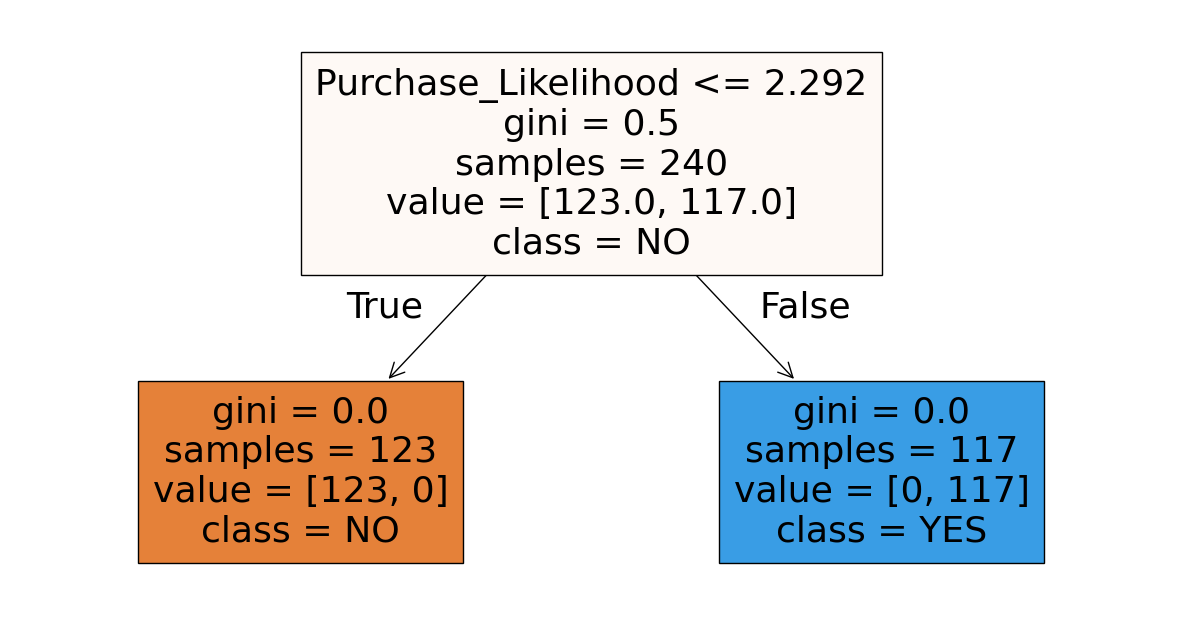

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns, class_names=['NO','YES'], filled=True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


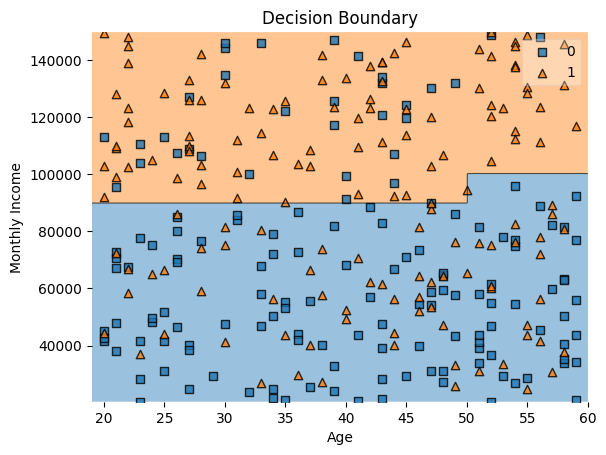

In [35]:
from sklearn.tree import DecisionTreeClassifier
X2 = df[['Age', 'Monthly_Income']]
y2 = df['Purchase']

dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X2, y2)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X2.values, y2.values, clf=dt2)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Decision Boundary")
plt.show()